# Exercise 4: Extracting Quantitative Measures from EEG spectra 

### This exercise makes use of data from the paper 

### Dissociable Decoding of Working Memory and Spatial Attention from EEG Oscillations and Sustained Potentials"

#### Bae, G. Y., & Luck, S. J. (2018). Dissociable Decoding of Spatial Attention and Working Memory from EEG Oscillations and Sustained Potentials. Journal of Neuroscience, 38(2), 409-422.

#### The paper is available in the readings folder.  

## This data set is potentially a very good data set to use for your final project as it is information rich. 

#### Having said that, I dislike many aspects of the paper.  

#### Load modules that we need 

In [14]:
import numpy as np 
from matplotlib import pyplot as plt
from hdf5storage import loadmat, savemat 
from scipy.fftpack import fft 
from scipy import signal



In [15]:
data = loadmat('data/wm_orientation_506.mat')



In [16]:
data.keys()


dict_keys(['angle', 'channel', 'channel_names', 'eeg', 'response', 'samplingrate', 'time'])

In [17]:
#extract the variables from the dictionary 
eeg = data['eeg']
channel_names = data['channel_names']
angle = np.int16(data['angle'][0])
response = np.int16(data['response'][0])
samplingrate = int(data['samplingrate'][0])
time = np.int16(data['time'][0])
stimsamp = 375 #I looked at time to figure this out.  
ntrials = eeg.shape[0]
nchannels = eeg.shape[1]
nsamps = eeg.shape[2]

## README 

![Experiment](img/BaeLuckFigure1.jpg)

### In this experiment, participants are presented tear drops of different orientation for 200 ms.  

### After a delay period of 1300 ms, they rotate an arrow to match the orientation presented. 

### The data presented includes 1500 ms before the stimulus presented, 200 ms of stimulus presentation and 1300 ms of hold period. 

### The response period is not included. 

###  The variables contained here are 


*   `samplingrate` - number of samples of EEG in per second
*   `eeg` - eegdata of the experiment.  of dimensions, ntrials x nchannels x ntimepoints.  The EEG is provided in units of volts. 
*   `time` - the time relative to *stimulus onset* in each EEG observation.
*   `channel_names` - the name of the EEG channels indicating where it is located.    
*   `angle` - the angle of the teardrop stimulus  
*   `response` - the angle reported by the subject. 



## Problem #1


#### In the tutorial example. we compared the response when the task was to remember an angle of 0 degrees to the response when the angle was 180 degrees using 1 second after the stimulus presentation

`poststim = range(375,625,1)`

#### However, during this interval, the stimulus is presented on the screen for the first 200 ms (50 samples at a sampling rate of 250), so we may just be differentiating the stimulus itself. The most task relevant interval would be the period just prior to the response. 

#### a. Divide the 1.5 sec interval (375 samples) after stimulus presentation into 3 intervals of length 0.5 second (125 samples) and compute the average amplitude spectrum for each angle from 0 to 360 for each of the 3 intervals.  So there are 3 intervals 

* 0 -0.5s, samples 375-500
* 0.5 -1s, samples 500-625
* 1 -1.5s, samples 625- 750

#### b. For visualization, we will focus on PO7 and PO8 over the left and right hemispheres respectively, and the angles 0 and 180 which are pointing to the left and right.   For each of the three intervals, make a separate graph for PO7 and PO8 plotting the amplitude spectrum of the EEG for stimuli in memory at angle 0 and angle 180.  

In [18]:
poststim = range(375,500,1)
nsamp = len(poststim)
T = len(poststim)/samplingrate  # T should be 0.5 s
deltaf = 1/T # deltaf should be 2
fft_eeg = fft(eeg[:,:,poststim],axis = 2)
amplitude = 2*np.abs(fft_eeg)/nsamp/deltaf
amplitude_by_angle1 = dict()
angle_values = np.unique(angle)
for j in range(len(angle_values)):
    amplitude_by_angle1[angle_values[j]] = np.mean(amplitude[angle == angle_values[j],:,:],axis = 0)
poststim = range(500,625,1)
nsamp = len(poststim)
T = len(poststim)/samplingrate 
deltaf = 1/T
fft_eeg = fft(eeg[:,:,poststim],axis = 2)
amplitude = 2*np.abs(fft_eeg)/nsamp/deltaf
amplitude_by_angle2 = dict()
angle_values = np.unique(angle)
for j in range(len(angle_values)):
    amplitude_by_angle2[angle_values[j]] = np.mean(amplitude[angle == angle_values[j],:,:],axis = 0)
poststim = range(625,750,1)
nsamp = len(poststim)
T = len(poststim)/samplingrate 
deltaf = 1/T
fft_eeg = fft(eeg[:,:,poststim],axis = 2)
amplitude = 2*np.abs(fft_eeg)/nsamp/deltaf
amplitude_by_angle3 = dict()
angle_values = np.unique(angle)
for j in range(len(angle_values)):
    amplitude_by_angle3[angle_values[j]] = np.mean(amplitude[angle == angle_values[j],:,:],axis = 0)



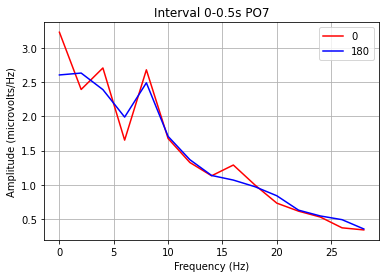

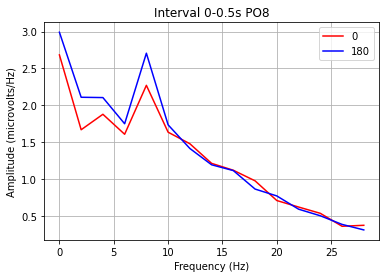

In [19]:
channel_left = 11
channel_right = 25
nsamp = len(poststim)
nf = 15 #since deltaf is 2, this takes it to 30 Hz 
f = np.arange(0,nf)*deltaf
plt.plot(f[range(nf)],amplitude_by_angle1[0][channel_left,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle1[180][channel_left,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0-0.5s ' + channel_names[channel_left])
plt.show()
plt.plot(f[range(nf)],amplitude_by_angle1[0][channel_right,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle1[180][channel_right,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0-0.5s ' + channel_names[channel_right])
plt.show()


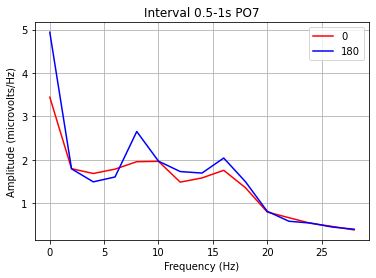

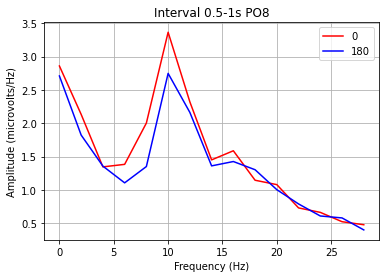

In [20]:
channel_left = 11
channel_right = 25
nsamp = len(poststim)
nf = 15 #since deltaf is 2, this takes it to 30 Hz 
f = np.arange(0,nf)*deltaf
plt.plot(f[range(nf)],amplitude_by_angle2[0][channel_left,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle2[180][channel_left,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0.5-1s ' + channel_names[channel_left])
plt.show()
plt.plot(f[range(nf)],amplitude_by_angle2[0][channel_right,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle2[180][channel_right,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0.5-1s ' + channel_names[channel_right])
plt.show()

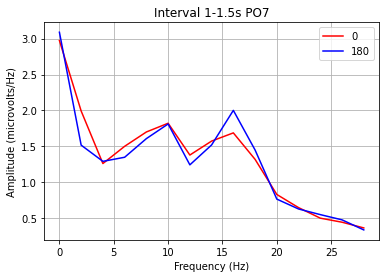

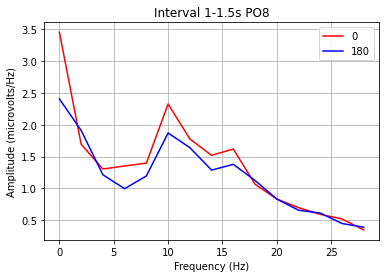

In [21]:
channel_left = 11
channel_right = 25
nsamp = len(poststim)
nf = 15 #since deltaf is 2, this takes it to 30 Hz 
f = np.arange(0,nf)*deltaf
plt.plot(f[range(nf)],amplitude_by_angle3[0][channel_left,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle3[180][channel_left,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 1-1.5s ' + channel_names[channel_left])
plt.show()
plt.plot(f[range(nf)],amplitude_by_angle3[0][channel_right,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle3[180][channel_right,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 1-1.5s ' + channel_names[channel_right])
plt.show()